# 2. Cardiovasular disease prediction

Data description (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=voteCount)

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [2235]:
import pandas as pd

df = pd.read_csv("../../_Data/ITHS_machine_learning_lab/cardio_train.csv", sep = ";")

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [2236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [2237]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 2.0 EDA

a) Cases and control counts are matched

In [2238]:
print(f"There are {df['cardio'].value_counts()[1]} with cardiovascular disease, and {df['cardio'].value_counts()[0]} without")

There are 34979 with cardiovascular disease, and 35021 without


b) A larger proportion of cases than controls have elevated cholesterol levels

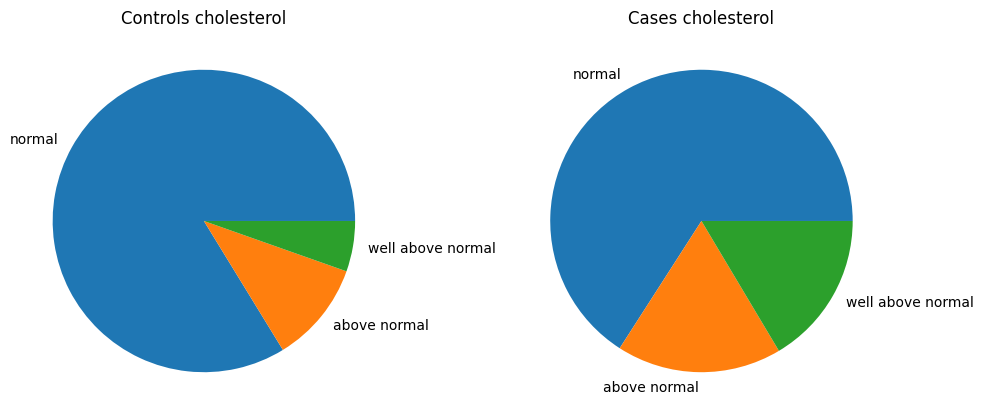

In [2239]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
cholesterol_labels = ["normal", "above normal", "well above normal"]

titles = ["Controls cholesterol", "Cases cholesterol"]

for i in range(0,2):
    df[df["cardio"] == i]["cholesterol"].value_counts().plot(
        kind="pie",
        labels=cholesterol_labels,
        ax=axes[i],
        title=titles[i],
    )
axes[0].set_ylabel("")
axes[1].set_ylabel("")

fig.tight_layout()

c) Cases are generally older than controls. Some ages are much more common than others which is likely an artifact of how the data was collected.

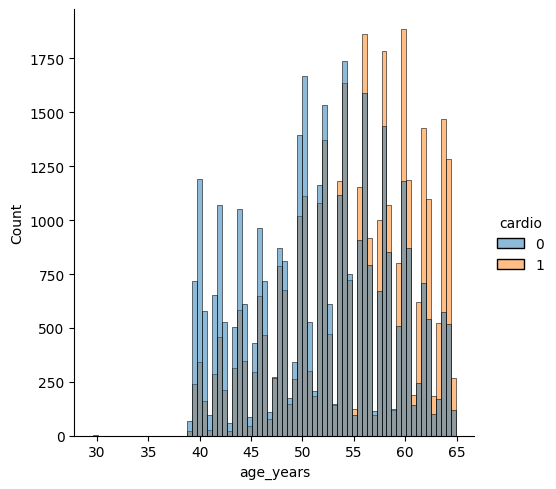

In [2240]:
import seaborn as sns

df["age_years"] = df["age"] / 365
sns.displot(df, x="age_years", hue="cardio")

d)

In [2241]:
print(f"There are {df['smoke'].value_counts()[1]} smokers, and {df['smoke'].value_counts()[0]} non-smokers")

There are 6169 smokers, and 63831 non-smokers


e-f) Looks like there are some outliers in weight and height, to deal with later

<Axes: xlabel='height', ylabel='Count'>

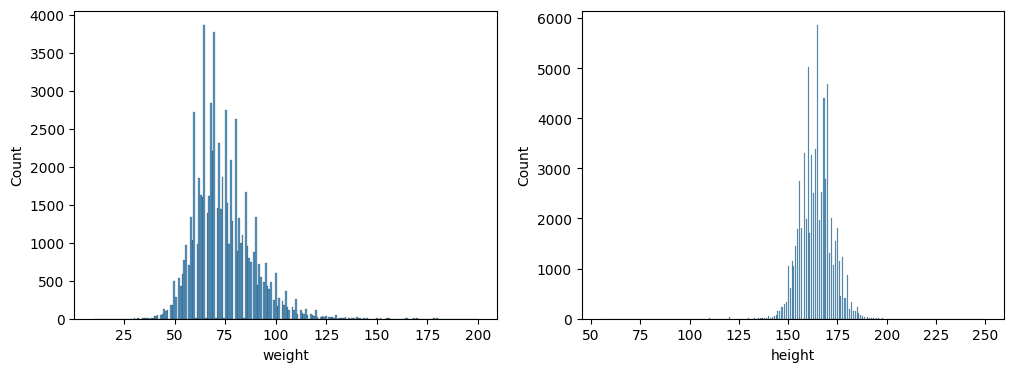

In [2242]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df["weight"], ax = ax[0])
sns.histplot(df["height"], ax = ax[1])

g) Very slightly higher proportion of cardiovascular disease in men. I would have expected a larger difference. The data might be gender-matched to control for confounding by gender. But age was not...

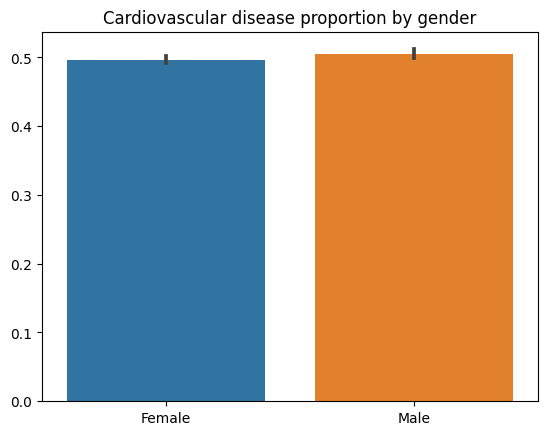

In [2243]:
# g)
sns.barplot(df, x = "gender", y = "cardio")
plt.xticks(ticks=[0,1],labels=["Female", "Male"])
plt.title("Cardiovascular disease proportion by gender")
plt.xlabel("")
plt.ylabel("");

## 2.1.0 Feature engineering - BMI

In [2245]:
df["bmi"] = df["weight"] / (df["height"]/100)**2

### a) BMI Outliers

Lots of outliers

<Axes: >

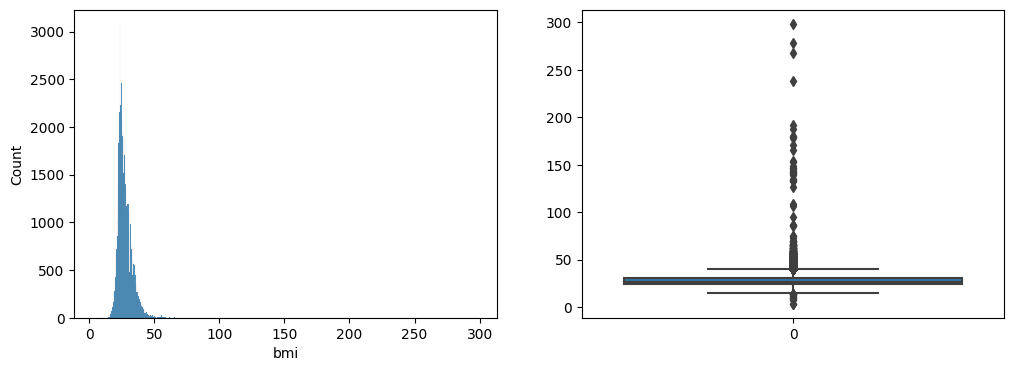

In [2246]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df["bmi"], ax=ax[0])
sns.boxplot(df["bmi"], ax=ax[1])

I want to do a quick filtering of outliers and I don't mind excluding some non-outliers in the process, since the data set is so large. A good method for this might be including data points within +- 3 standard deviation of the sample mean, after removing extreme height and weight outliers (to get a more representative sample mean and sample standard deviation).

The initial spans for height and weight filtering are admittedly a bit arbritrary

In [2247]:
spans = [df['height'].between(120,240), df['weight'].between(40,130)]
features = ["height", "weight", "bmi"]

def outlier_filter(df, spans, features):
    exclude_count = 0

    for i, span in enumerate(spans):
        excluded = len(df[~span])
        exclude_count += excluded
        df = df[span]
        print(f"Excluded {excluded} persons outside of {features[i]} span")

    for i in features:
        upper = df[i].mean() + 3 * df[i].std()
        lower = df[i].mean() - 3 * df[i].std()
        excluded = len(df[~df[i].between(lower, upper)])
        exclude_count += excluded
        print(f"Excluded {excluded} persons with {i} outside of mean +- 3std")
        df = df[df[i].between(lower, upper)]

    print(f"In total {exclude_count} persons were excluded\n")

    return df

df = outlier_filter(df, spans, features)

Excluded 53 persons outside of height span
Excluded 247 persons outside of weight span
Excluded 274 persons with height outside of mean +- 3std
Excluded 589 persons with weight outside of mean +- 3std
Excluded 601 persons with bmi outside of mean +- 3std
In total 1764 persons were excluded



/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/2754013942.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  excluded = len(df[~span])
/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/2754013942.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[span]


Now it looks much better. There is a slight positive skew which is in line with previously observed distributions of BMI

<Axes: >

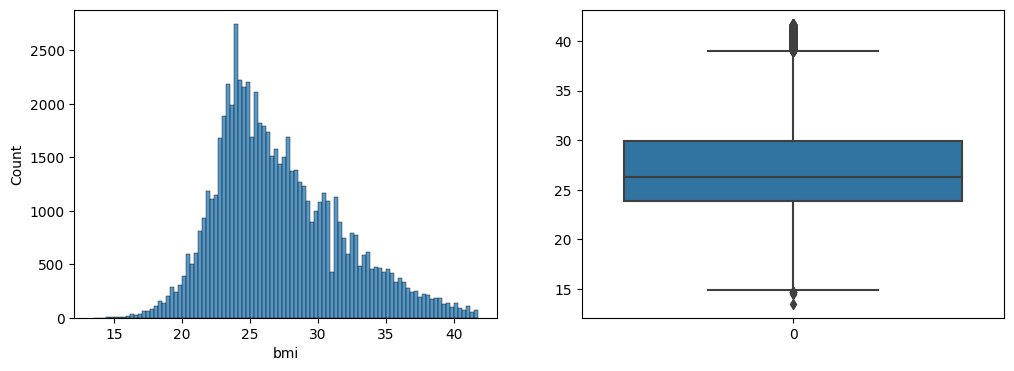

In [2248]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df["bmi"], ax=ax[0])
sns.boxplot(df["bmi"], ax=ax[1])

### b) New BMI features

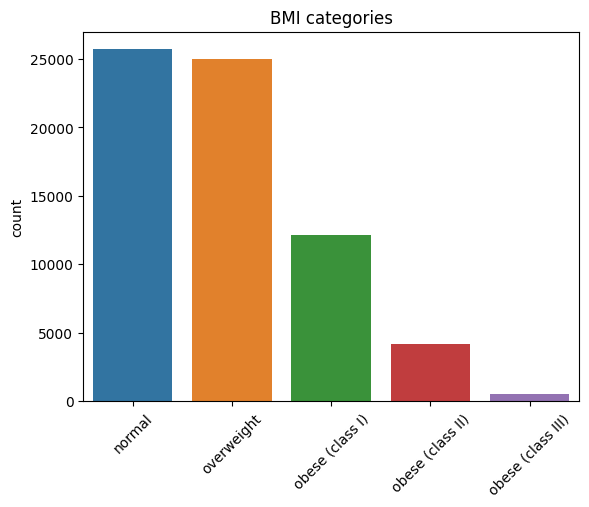

In [2249]:
df["bmi_class"] = None

class_list = [
    "normal",
    "overweight",
    "obese (class I)",
    "obese (class II)",
    "obese (class III)",
]

# filling up new column "bmi_class"
df.loc[df["bmi"].between(18.5, 25, inclusive="left"), "bmi_class"] = 1
df.loc[df["bmi"].between(25, 30, inclusive="left"), "bmi_class"] = 2
df.loc[df["bmi"].between(30, 35, inclusive="left"), "bmi_class"] = 3
df.loc[df["bmi"].between(35, 40, inclusive="left"), "bmi_class"] = 4
df.loc[df["bmi"] >= 40, "bmi_class"] = 5

fig, ax = plt.subplots()
sns.countplot(df, x="bmi_class", order=list(range(1,6)))
ax.set_title("BMI categories")
ax.set_xticklabels(class_list)
ax.set_xlabel("")
plt.xticks(rotation=45);

In [2256]:
print(df[df["bmi_class"].isna()]["bmi"].max())
df["bmi_class"].isna().sum() # 590 are underweight, and do not have a class

18.49649887699828


590

## 2.1.1 Feature engineering - Blood pressure

### a) Blood pressure outliers

There are many extreme blood pressure outliers

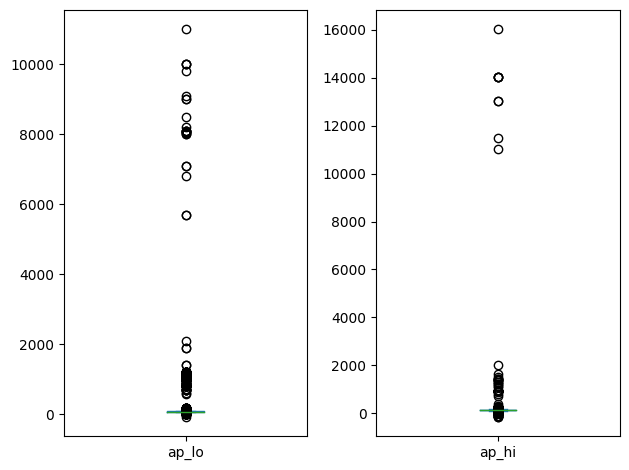

In [2257]:
fig, axes = plt.subplots(1,2)
df['ap_lo'].plot(kind="box", ax=axes[0])
df['ap_hi'].plot(kind="box", ax=axes[1])
fig.tight_layout()

First step is to exclude those whose diastolic bp is higher than their systolic bp

In [2258]:
print(f"Excluded {len(df[~(df['ap_hi'] > df['ap_lo'])])} persons with diastolic bp higher than systolic bp")

df = df[df["ap_hi"] > df["ap_lo"]]

Excluded 1170 persons with diastolic bp higher than systolic bp


Next I will use outlier_filter(), defined above and for the same reason.

Initial spans for filtering are again arbitrary. My filtering for the upper bound assumes that persons with hypertensive crisis should not be represented in the data, and symmetry around the reference intervals for the lower bound (technically incorrect).

- < 90 systolic is hypotension
- \> 140 systolic is hypertension
- Span includes 30 below and above (10 below hypertensive crisis)
- \> 90 diastolic is hypertension
- < 60 diastolic is hypotension
- Span includes 20 below and above (10 below hypertensive crisis)

In [2259]:
spans = [df["ap_hi"].between(60, 170), df["ap_lo"].between(40, 110)]
features = ["ap_hi", "ap_lo"]
df = outlier_filter(df, spans, features)

Excluded 904 persons outside of ap_hi span
Excluded 128 persons outside of ap_lo span
Excluded 66 persons with ap_hi outside of mean +- 3std
Excluded 318 persons with ap_lo outside of mean +- 3std
In total 1416 persons were excluded



/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/2754013942.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  excluded = len(df[~span])
/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/2754013942.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[span]


The lower bounds are likely too inclusive in relation to the upper bounds, but it looks a lot better at least

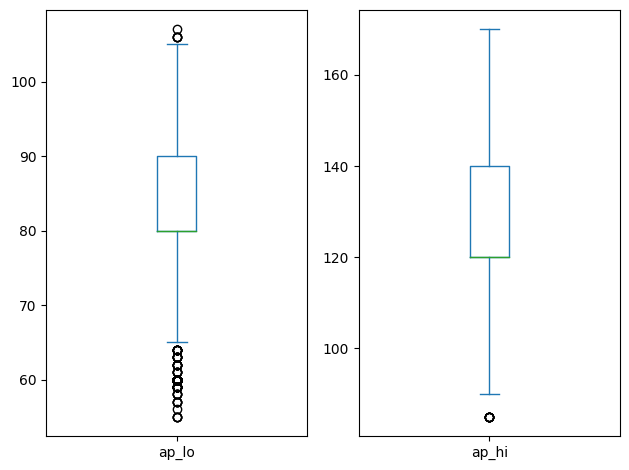

In [2260]:
fig, axes = plt.subplots(1,2)
df['ap_lo'].plot(kind="box", ax=axes[0])
df['ap_hi'].plot(kind="box", ax=axes[1])
fig.tight_layout()

In [2261]:
df["cardio"].value_counts() # cases and controls are still fairly balanced after outlier removal

0    33838
1    31812
Name: cardio, dtype: int64

### b) New bp features

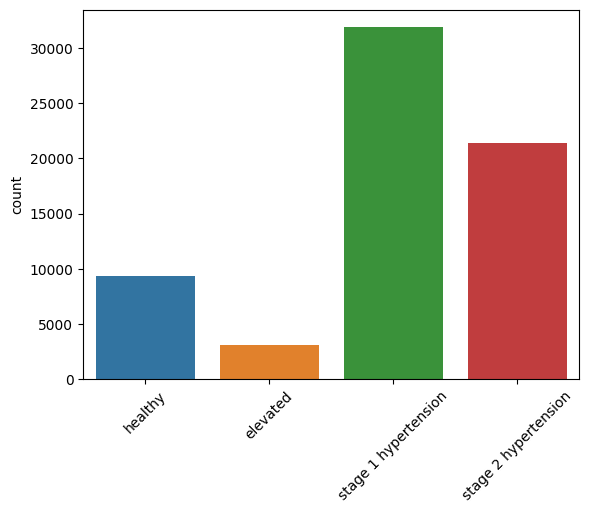

In [2262]:
cat_list = ["healthy", "elevated", "stage 1 hypertension", "stage 2 hypertension"]
df["ap_cats"] = None

# filling up new column "ap_cats"
df.loc[((df["ap_hi"] < 120) & (df["ap_lo"] < 80)), "ap_cats"] = 1
df.loc[((df["ap_hi"].between(120, 130, inclusive="left")) & (df["ap_lo"] < 80)), "ap_cats"] = 2
df.loc[
    ((df["ap_hi"].between(130, 140, inclusive="left")) | (df["ap_lo"].between(80, 90, inclusive="left"))), "ap_cats"
] = 3
df.loc[((df["ap_hi"] >= 140) | (df["ap_lo"] >= 90)), "ap_cats"] = 4

fig, ax = plt.subplots()
sns.countplot(df, x="ap_cats", order = list(range(1,5)))
ax.set_xticklabels(cat_list)
ax.set_xlabel("")
plt.xticks(rotation=45);

In [2263]:
df["ap_cats"].isna().sum()

0

## 2.2.0 Barplots of cardiovascular disease ratios by category

With the exception of CVD being more common in overweight persons than persons with class I obesity, assocations between CVD ratios and BMI, blood pressure, cholesterol, blood sugar levels, physical activity are generally as expected. It is strange, however, that we see lower CVD ratios in alcohol consumers and smokers. If the alcohol consumption includes moderate consumers, this could be explained by the known association of moderate alcohol consumption with cardiovascular health.

In [2264]:
df["alco"].value_counts()

0    62208
1     3442
Name: alco, dtype: int64

Looking at the small proportion of alcohol consumers, it is unlikely to include moderate consumers and so this is a strange finding. The lower CVD ratio of smokers is even stranger.

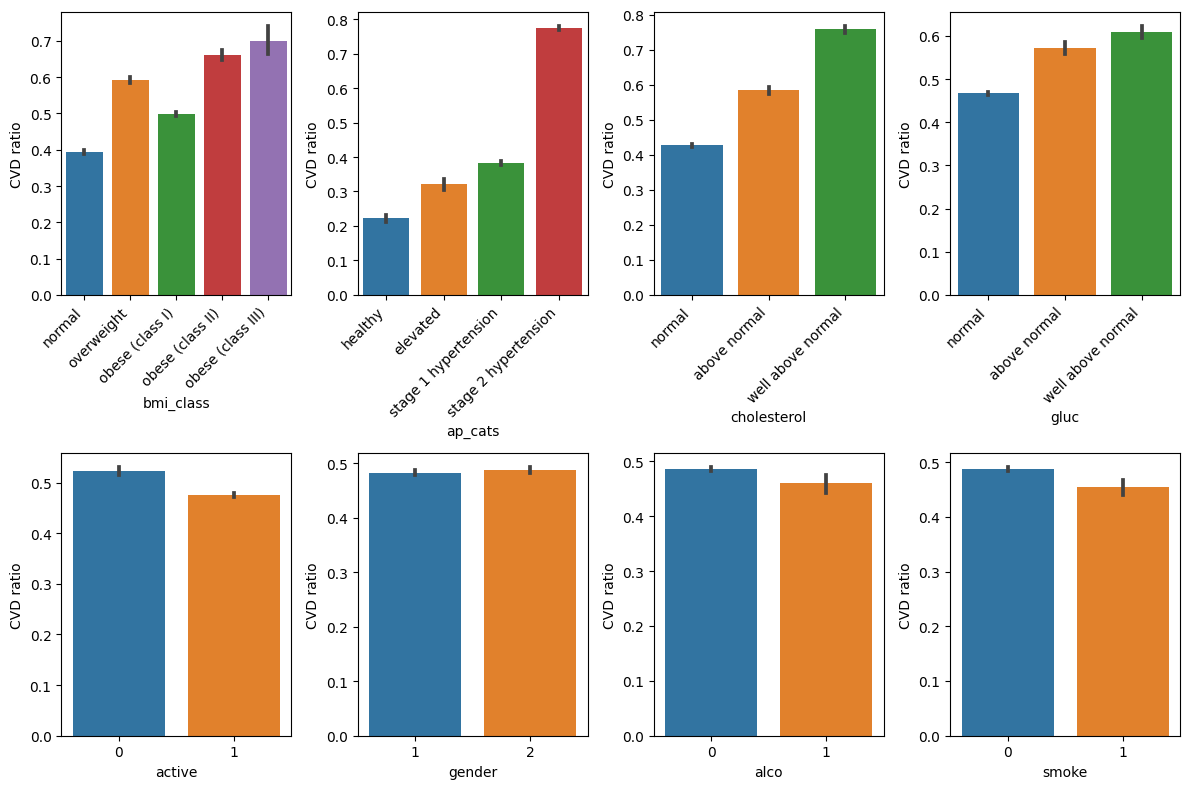

In [2266]:
fig, ax = plt.subplots(2,4, figsize = (12, 8))
ax = ax.flatten()

list_categorical = ["bmi_class", "ap_cats", "cholesterol", "gluc", "active", "gender", "alco", "smoke"]

for i, cat in enumerate(list_categorical):
    sns.barplot(df, x = cat, y = "cardio", ax = ax[i])
    ax[i].set_ylabel("CVD ratio")

ax[0].set_xticklabels(class_list, rotation = 45, ha = "right")
ax[1].set_xticklabels(cat_list, rotation = 45, ha = "right")
ax[2].set_xticklabels(cholesterol_labels, rotation = 45, ha = "right")
ax[3].set_xticklabels(cholesterol_labels, rotation = 45, ha = "right")

fig.tight_layout()

## 2.1.1 Feature correlations

- Increased age is correlated with higher blood pressure and higher BMI
- Weight is also correlated with blood pressure and BMI (and height of course)
- Height is inversely correlated with BMI
- BMI and blood pressure are correlated with each other

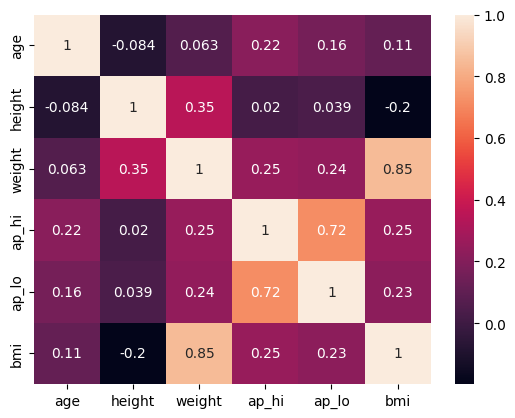

In [2272]:
list_numerical = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]

sns.heatmap(df.loc[:, list_numerical].corr(), annot=True);

## 2.3 Create two data sets

df2, including original blood pressure and bmi variables, should produce better results since the categorical variables of df1 contain less information

In [2273]:
df["gender"] = pd.Categorical(df["gender"]) # specify categorical for one-hot encoding
hot_list = ["gender", "bmi_class", "ap_cats"] # columns for one-hot encoding

# dropping variables for the two data sets
df1 = df.drop(["id", "ap_hi", "ap_lo", "height", "weight", "bmi", "age_years"], axis=1)
df2 = df.drop(["id", "bmi_class", "ap_cats", "height", "weight", 'age_years'], axis=1)

# one-hot encoding
df1_ones = pd.get_dummies(df[hot_list])
df1 = df1.drop(hot_list, axis=1)
df1 = df1.join(df1_ones)
df1.rename({"gender_2": "gender"}, axis=1, inplace=True)
df1 = df1.drop("gender_1", axis=1)

df2_ones = pd.get_dummies(df["gender"], drop_first=True)
df2_ones.rename({2: "gender"}, axis=1, inplace=True)
df2 = df2.drop("gender", axis=1)
df2 = df2.join(df2_ones)

df1.shape, df2.shape

/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/4247154986.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])
/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/4247154986.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])


((65650, 17), (65650, 11))

## 2.4 Choosing a model

In [2274]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

### Functions for splitting and scaling the data, grid searching for model parameters, and aggregating the accuracy scores and optimal parameters

Should move these to .py file and import

In [2275]:
def splitter_scaler(df, scaler, validation_data=True):
    """
    Splits the df into train, val (optional) and test data.
    Also scales the data using scaler of choice.
    """
    # train test split
    X, y = df.drop("cardio", axis=1), df["cardio"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    if validation_data:
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

    # scaling the data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if validation_data:
        X_val_scaled = scaler.transform(X_val)
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test
    else:
        return X_train_scaled, X_test_scaled, y_train, y_test

In [2280]:
def model_selector(model):
    """
    Performs GridSearchCV on model + parameter grid of choice.
    Uses accuracy for scoring since we're dealing with a balanced data set.
    """

    classifier = GridSearchCV(
        model, param_grid=param_grids[model], cv=5, scoring="accuracy"
    )
    classifier.fit(X_train_scaled, y_train)

    return classifier

In [2277]:
def model_collector(model_list):
    """
    Calls model_selector() on models in model_list.
    For each model, saves selected model, confusion matrix, and classification reports in dictionaries.
    Collects accuracy scores for each model in a data frame.
    """
    # setting up df for collection of model parameters and accuracy
    model_df0 = pd.DataFrame(columns=["model", "parameters", "accuracy"])

    reports0 = {}
    graphs0 = {}
    models0 = {}

    # loop to plot confusion matrices and fill up model_df
    for i, model in enumerate(model_list):
        classifier = model_selector(model)
        y_pred = classifier.predict(X_val_scaled)

        model_name = str(model).split("(")[0]
        params = classifier.best_params_
        accuracy = accuracy_score(y_val, y_pred)

        # summarize model in df
        model_df0.loc[i] = [model_name, params, accuracy]

        # save confusion matrix graph in a dictionary
        cm = confusion_matrix(y_val, y_pred)
        graphs0[model_name] = ConfusionMatrixDisplay(cm)

        # save classification reports in a dictionary
        reports0[model_name] = classification_report(y_val, y_pred)

        # save optimal model in a dictionary
        models0[model_name] = classifier.best_estimator_

    return model_df0, models0, reports0, graphs0


### Models to include in model_list and their parameter grids

I'm including three models suitable for binary classification : k-nearest neighbors, logistic regression, and random forest.

Parameters to tune:
- k-nearest neighbors: k
- logistic regression: using elasticnet, so it will tune the ratio of L1 regularization from 0 to 1
- random forest: number of trees (n_estimators) and depth of each tree (max_depth)

In [2281]:
model_KNN = KNeighborsClassifier()
model_logistic = LogisticRegression(
    penalty="elasticnet", solver="saga", multi_class="auto", max_iter=10000
)
model_rf = RandomForestClassifier(random_state=42)

param_grids = {
    model_KNN:  {"n_neighbors": list(range(50, 120, 5))},
    model_logistic: {"l1_ratio": np.linspace(0, 1, 10)},
    model_rf: {"n_estimators": [100, 150], "max_depth": [5, 10, 15]}
}

model_list = [i for i in param_grids.keys()]

### Collecting summary df and reports and graphs for each model

In [2282]:
model_df = pd.DataFrame()

# using nested dictionaries for collecting reports, graphs and models
# for example: reports["df1"]["StandardScaler"]["LogisticRegression"]
reports = {}
graphs = {}
models = {}

for i, df in enumerate([df1, df2]):

    reports2 = {}
    graphs2 = {}
    models2 = {}

    for scaler in [StandardScaler(), MinMaxScaler()]:

        X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test = splitter_scaler(df, scaler)

        model_df1, models1, reports1, graphs1 = model_collector(model_list)
        model_df1["scaler"] = str(scaler)
        model_df1["df"] = i+1
        
        reports2[str(scaler).strip("()")] = reports1
        graphs2[str(scaler).strip("()")] = graphs1
        models2[str(scaler).strip("()")] = models1


        model_df = pd.concat([model_df, model_df1])

    reports["df" + str(i+1)] = reports2
    graphs["df" + str(i+1)] = graphs2
    models["df" + str(i+1)] = models2

The random forest clf on df2 features is the optimal model.

But all models perform very similarly. Perhaps more tuning of parameters would change this.

As expected, models based on df2 features perform better, but it's a very small difference. Scaling method doesn't seem to matter.

In [2284]:
model_df.sort_values(by = "accuracy", ascending=False)

,model,parameters,accuracy,scaler,df
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.734101,StandardScaler(),2
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 100}",0.733435,MinMaxScaler(),2
0,KNeighborsClassifier,{'n_neighbors': 75},0.728865,StandardScaler(),2
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.727913,StandardScaler(),1
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.727818,MinMaxScaler(),1
0,KNeighborsClassifier,{'n_neighbors': 60},0.727628,MinMaxScaler(),2
1,LogisticRegression,{'l1_ratio': 0.0},0.725819,StandardScaler(),2
1,LogisticRegression,{'l1_ratio': 0.4444444444444444},0.725724,MinMaxScaler(),2
0,KNeighborsClassifier,{'n_neighbors': 105},0.724105,MinMaxScaler(),1
0,KNeighborsClassifier,{'n_neighbors': 115},0.724010,StandardScaler(),1


### Retrain optimal model on all but test data

In [2285]:
X_train_scaled, X_test_scaled, y_train, y_test = splitter_scaler(
    df2, StandardScaler(), validation_data=False
)

model_final = models["df2"]["StandardScaler"]["RandomForestClassifier"].fit(
    X_train_scaled, y_train
)
y_pred = model_final.predict(X_test_scaled)

# collecting final graphs and reports in same dictionary
graphs["df2-test"] = {}
graphs["df2-test"]["RandomForestClassifier"] = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred)
)

reports["df2-test"] = {}
reports["df2-test"]["RandomForestClassifier"] = classification_report(
    y_test, y_pred, digits=3
)

print(
    f"Final Random Forest clf model accuracy on test data: {accuracy_score(y_test, y_pred):.3f}"
)

Final Random Forest clf model accuracy on test data: 0.734


## 2.5 Ensemble

In [2286]:
# source: https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/
from sklearn.ensemble import VotingClassifier

X_train_scaled, X_test_scaled, y_train, y_test = splitter_scaler(df2, StandardScaler(), validation_data=False)

# group / ensemble of models
estimator = [(name, model) for name, model in models["df2"]["StandardScaler"].items()]

# hard voting: majority vote
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train_scaled, y_train)
y_pred = vot_hard.predict(X_test_scaled)
  
# save graph and report
graphs["df2-test"]["Ensemble-Hard"] = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
reports["df2-test"]["Ensemble-Hard"] = classification_report(y_test,y_pred, digits=3)
print(f"Hard Voting Classifier accuracy on test data: {accuracy_score(y_test, y_pred):.3f}")
  
# soft voting: average probabilities used for vote
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train_scaled, y_train)
y_pred = vot_soft.predict(X_test_scaled)
  
# save graph and report
graphs["df2-test"]["Ensemble-Soft"] = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
reports["df2-test"]["Ensemble-Soft"] = classification_report(y_test,y_pred, digits=3)
print(f"Soft Voting Classifier accuracy on test data: {accuracy_score(y_test, y_pred):.3f}")

Hard Voting Classifier accuracy on test data: 0.733
Soft Voting Classifier accuracy on test data: 0.733


## 2.6 Evaluations

Optimal model and ensemble model all perform extremely similarly with a sensitivity (recall) around 0.66 and a specificity around 0.8. So the models are better at excluding disease than detecting disease. The optimal model by itself has a slightly higher accuracy.

In [2302]:
for i, (name, report) in enumerate(reports["df2-test"].items()):
    print(name)
    print(report)

RandomForestClassifier
              precision    recall  f1-score   support

           0      0.712     0.805     0.756      6711
           1      0.764     0.659     0.708      6419

    accuracy                          0.734     13130
   macro avg      0.738     0.732     0.732     13130
weighted avg      0.738     0.734     0.732     13130

Ensemble-Hard
              precision    recall  f1-score   support

           0      0.711     0.803     0.755      6711
           1      0.762     0.659     0.707      6419

    accuracy                          0.733     13130
   macro avg      0.737     0.731     0.731     13130
weighted avg      0.736     0.733     0.731     13130

Ensemble-Soft
              precision    recall  f1-score   support

           0      0.713     0.800     0.754      6711
           1      0.760     0.663     0.708      6419

    accuracy                          0.733     13130
   macro avg      0.736     0.731     0.731     13130
weighted avg      0.736

Since cases and controls counts are pretty evenly matched, specificity/sensitivity ratio can be seen in upper left/bottom right count ratio.

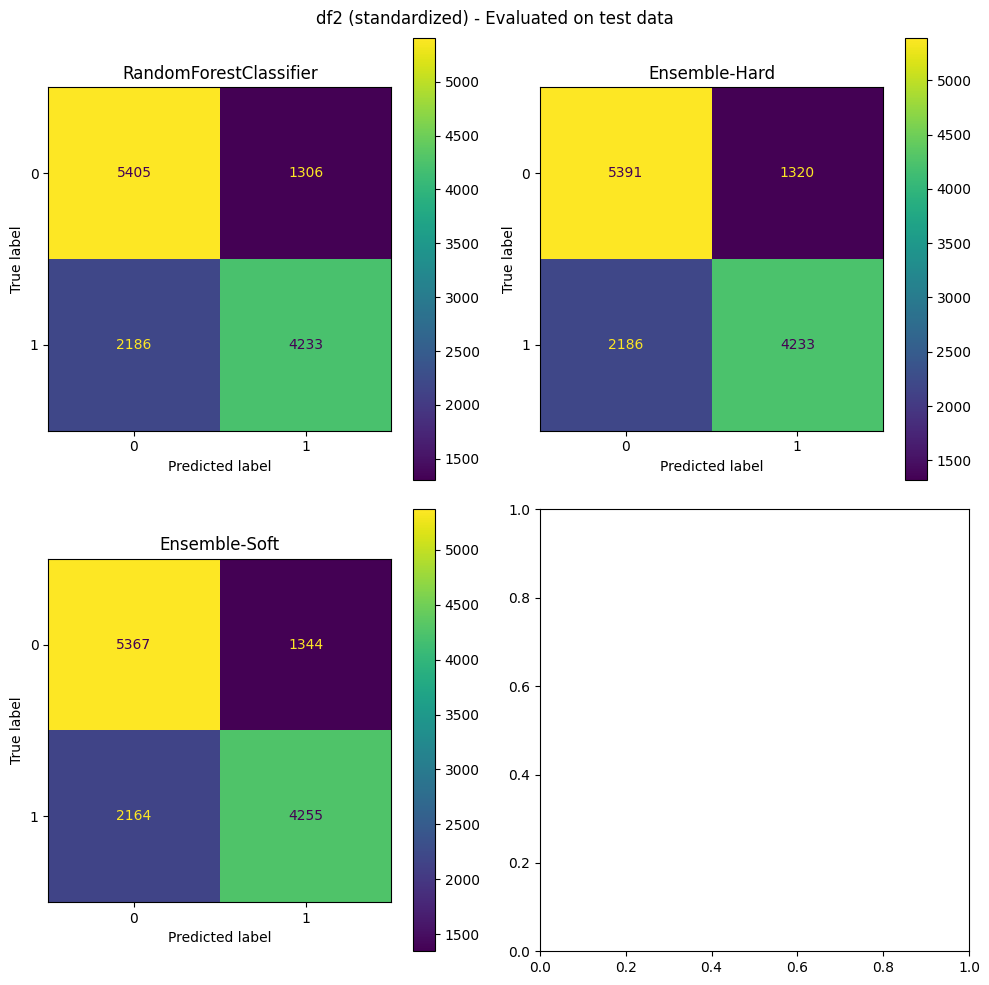

In [2303]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, (name, graph) in enumerate(graphs["df2-test"].items()):
    graph.plot(ax = axes[i])
    axes[i].set_title(f"{name}")

fig.suptitle(f"df2 (standardized) - Evaluated on test data")
fig.tight_layout()

As a side note, the ensemble models are so similar to optimal random classifier model since all the models have a similar sensitivity and specificity:

In [2306]:
for i, (name, report) in enumerate(reports["df2"]["StandardScaler"].items()):
    print(name)
    print(report)

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      5381
           1       0.75      0.66      0.70      5123

    accuracy                           0.73     10504
   macro avg       0.73      0.73      0.73     10504
weighted avg       0.73      0.73      0.73     10504

LogisticRegression
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5381
           1       0.75      0.65      0.70      5123

    accuracy                           0.73     10504
   macro avg       0.73      0.72      0.72     10504
weighted avg       0.73      0.73      0.72     10504

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      5381
           1       0.76      0.67      0.71      5123

    accuracy                           0.73     10504
   macro avg       0.74      0.73      0.73     10504
weighted av

We might also look at a ROC curve to see what changing the optimal model's decision boundary does to its sensitivty (true positive rate) and specificity (1 - false positive rate)

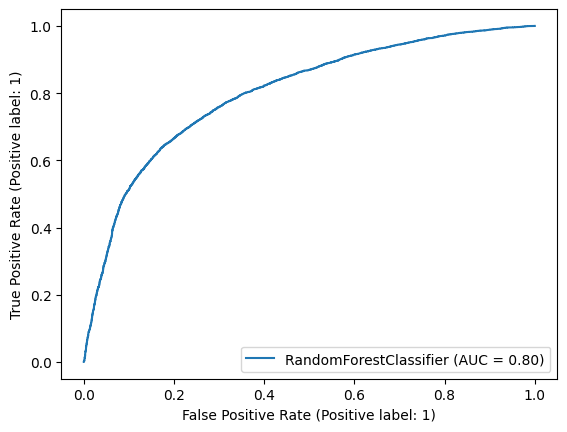

In [2304]:
from sklearn.metrics import RocCurveDisplay

X_train_scaled, X_test_scaled, y_train, y_test = splitter_scaler(
    df2, StandardScaler(), validation_data=False
)

RocCurveDisplay.from_estimator(model_final, X_test_scaled, y_test)

## 2.7 Deploy

In [2309]:
import joblib

# 100 random samples to file
df_deploy_test = df2.sample(100, random_state=42)
df_deploy_test.to_csv("test_samples.csv")

# make training set out of all but the 100 random samples
df_deploy_train = df2.drop(df_deploy_test.index)
X, y = df_deploy_train.drop("cardio", axis=1), df_deploy_train["cardio"]

# rescale and fit model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_final.fit(X_scaled, y)

# export fitted model and fitted scaler
joblib.dump(model_final, "model_final.pkl", compress=True)
joblib.dump(scaler, "scaler.bin", compress=True)

['scaler.bin']